In [1]:
from onedcellsim.simulations import new_model
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Define the parameter values and ranges
L0_min, L0_max, L0_step = 1, 30, 0.1
gamma_f_min, gamma_f_max, gamma_f_step = 0.1, 100, 0.1
gamma_b_min, gamma_b_max, gamma_b_step = 0.1, 1, 0.1
mf_min, mf_max, mf_step = 0.1, 10, 0.1
mb_min, mb_max, mb_step = 0.1, 10, 0.1
mc_min, mc_max, mc_step = 0.01, 1, 0.01
Fc_min, Fc_max, Fc_step = 0.0, 1000, 1
wc_min, wc_max, wc_step = 0.001, 1, 0.0001
zeta_min, zeta_max, zeta_step = 0.1, 10, 0.1
phi_min, phi_max, phi_step = 0, 2, 0.1

# Define the slider widgets for each parameter
L0_slider = widgets.FloatSlider(value=25, min=L0_min, max=L0_max, step=L0_step, description='L0')
gamma_f_slider = widgets.FloatSlider(value=30, min=gamma_f_min, max=gamma_f_max, step=gamma_f_step, description='gamma_f', readout_format='.3f')
gamma_b_slider = widgets.FloatSlider(value=1e-3, min=gamma_b_min, max=gamma_b_max, step=gamma_b_step, description='gamma_b', readout_format='.3f')
mf_slider = widgets.FloatSlider(value=1, min=mf_min, max=mf_max, step=mf_step, description='mf')
mb_slider = widgets.FloatSlider(value=1, min=mb_min, max=mb_max, step=mb_step, description='mb')
mc_slider = widgets.FloatSlider(value=0.1, min=mc_min, max=mc_max, step=mc_step, description='mc')
Lf0_slider = widgets.FloatSlider(value=40, min=0, max=100, step=1, description='Lf0')
Fc_slider = widgets.FloatSlider(value=0, min=Fc_min, max=Fc_max, step=Fc_step, description='Fc')
wc_slider = widgets.FloatSlider(value=0.001, min=wc_min, max=wc_max, step=wc_step, description='wc', readout_format='.3f')
zeta_slider = widgets.FloatSlider(value=0.1, min=zeta_min, max=zeta_max, step=zeta_step, description='zeta', readout_format='.3f')
phi_slider = widgets.FloatSlider(value=0, min=phi_min, max=phi_max, step=phi_step, description='phi', readout_format='.2f')

# Define the plotting function
def plot_simulation(L0, gamma_f, gamma_b, mf, mb, mc, Lf0, Fc, wc, zeta, phi):
    parameters = {'L0': L0, 'gamma_f': gamma_f, 'gamma_b': gamma_f, 'mf': mf, 'mb': mb, 'mc': mc, 'Fc': Fc, 'wc': wc, 'zeta': zeta, 'phi': phi}
    model = new_model.Model(parameters)
    t_span = [0, 5]
    yinit = [Lf0, Lf0, 0, 0, 00, 0]
    sol = model.solve(t_span, yinit, t_eval = np.linspace(0,5,100))
    Lf, Lb, xc, vf, vb, vc = sol.y
    assert sol.y.shape[0] == 6
    fig, axes = plt.subplots(ncols=2)
    ax, axf = axes
    ax.plot(sol.t, Lf+xc, label='Lf+xc')
    ax.plot(sol.t, xc-Lb, label='xc-Lb')
    ax.plot(sol.t, xc, label='xc')

    Lf_freq = np.abs(np.fft.rfft(Lf))[1:]
    freqs = np.fft.rfftfreq(Lf.size, 5/100)[1:]
    axf.plot(1/freqs, Lf_freq, label='vf')
    axf.text(0, Lf_freq.max()*0.8, f'{1/freqs[np.argmax(Lf_freq)]:.2f}')
    #Calculate the power spectrum of Lf
    Lb_freq = np.abs(np.fft.fft(Lb))

    #axf.plot(sol.t, Lb_freq, label='vb')
    ax.set_ylim([-200, 200])
    ax.legend()
    plt.show()

# Combine the sliders and plotting function into an interactive widget
interactive_plot = widgets.interactive(plot_simulation, L0=L0_slider, gamma_f=gamma_f_slider, gamma_b=gamma_b_slider, mf=mf_slider, mb=mb_slider, mc=mc_slider, Lf0=Lf0_slider, Fc=Fc_slider, wc=wc_slider, zeta=zeta_slider, phi=phi_slider)
plt.show()
display(interactive_plot)

interactive(children=(FloatSlider(value=25.0, description='L0', max=30.0, min=1.0), FloatSlider(value=30.0, de…

In [2]:
%load_ext autoreload

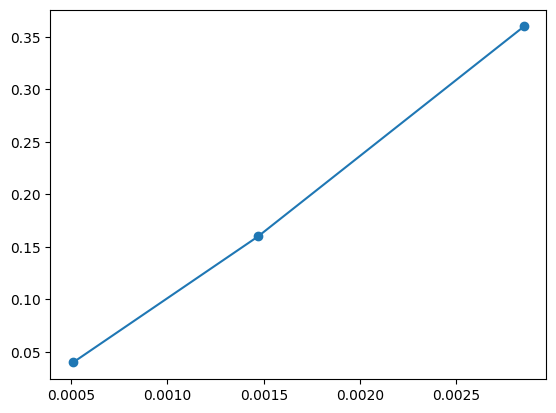

In [21]:
E = [2.85e-3, 1.47e-3, 5.1e-4]
npeaks = np.array([3, 2, 1])
T = 5/npeaks
plt.plot(E, 1/T**2, marker='o')

In [122]:
%autoreload
##Now plot sliders for the GovModel

# Define the parameter values and ranges

E_min, E_max, E_step, E_default = 0, 1.6, 0.1, 0.8
Ve0_min, Ve0_max, Ve0_step, Ve0_default = .01, 10, .01, 1
#zeta_min, zeta_max, zeta_step, zeta_default = 0.1, 10, 0.1, 1
#N_min, N_max, N_step, N_default = 40, 50, 1, 45
#kon_min, kon_max, kon_step, kon_default = 1e-4, 1e-2, 1e-4, 1e-3
#koff_min, koff_max, koff_step, koff_default = 1e-4, 1e-2, 1e-4, 1e-3
r_min, r_max, r_step, r_default = 0.1, 10, 0.1, 8.5
fs_min, fs_max, fs_step, fs_default = 4, 6, 0.1, 5
k_min, k_max, k_step, k_default = 20, 30, 0.1, 20
#alpha_min, alpha_max, alpha_step, alpha_default = 0.071, 0.2, 0.001, 0.1

# Define the slider widgets for each parameter
# L0_slider = widgets.FloatSlider(value=L_default, min=L0_min, max=L0_max, step=L0_step, description='L0')
E_slider = widgets.FloatSlider(value=E_default, min=E_min, max=E_max, step=E_step, description='E', readout_format='.3f')
Ve0_slider = widgets.FloatSlider(value=Ve0_default, min=Ve0_min, max=Ve0_max, step=Ve0_step, description='Ve0', readout_format='.3f')
# zeta_slider = widgets.FloatSlider(value=zeta_default, min=zeta_min, max=zeta_max, step=zeta_step, description='zeta')
# N_slider = widgets.FloatSlider(value=N_default, min=N_min, max=N_max, step=N_step, description='N')
# kon_slider = widgets.FloatSlider(value=kon_default, min=kon_min, max=kon_max, step=kon_step, description='kon')
# koff_slider = widgets.FloatSlider(value=koff_default, min=koff_min, max=koff_max, step=koff_step, description='koff')
fs_slider = widgets.FloatSlider(value=fs_default, min=fs_min, max=fs_max, step=fs_step, description='fs')
r_slider = widgets.FloatSlider(value=r_default, min=r_min, max=r_max, step=r_step, description='r')
k_slider = widgets.FloatSlider(value=k_default, min=k_min, max=k_max, step=k_step, description='k')
# alpha_slider = widgets.FloatSlider(value=alpha_default, min=alpha_min, max=alpha_max, step=alpha_step, description='alpha')

# zeta_slider = widgets.FloatSlider(value=1, min=zeta_min, max=zeta_max, step=zeta_step, description='zeta')
# N_slider = widgets.FloatSlider(value=1, min=N_min, max=N_max, step=N_step, description='N')
# kon_slider = widgets.FloatSlider(value=1, min=kon_min, max=kon_max, step=kon_step, description='kon')
# koff_slider = widgets.FloatSlider(value=1, min=koff_min, max=koff_max, step=koff_step, description='koff')
# fs_slider = widgets.FloatSlider(value=1, min=fs_min, max=fs_max, step=fs_step, description='fs')
# alpha_slider = widgets.FloatSlider(value=1, min=alpha_min, max=alpha_max, step=alpha_step, description='alpha')

# Define the plotting function
def plot_simulation(E, Ve0, r, fs, k):
    # Define the parameters
    parameters = {'E': E, 'Ve0': Ve0, 'r': r, 'fs': fs, 'k': k}

    model = new_model.GovModel(parameters)
    t_span = [0, 5]
    t_eval = np.linspace(0,5,100)
    #t_eval=None
    yinit = [2, 0.8]
    global sol
    t, y = model.solve(t_span, yinit, t_eval = t_eval, method='BDF')
    Lf, n = y
    #assert sol.y.shape[0] == 2
    #print(sol.t)
    fig, axes = plt.subplots(ncols=2)
    ax, axf = axes
    ax.plot(t, Lf, label='Lf')
    axf.plot(t, n, label='n')
    #plt.show()
    

In [123]:
interactive_plot = widgets.interactive(plot_simulation, E=E_slider, Ve0=Ve0_slider, fs=fs_slider, r=r_slider, k=k_slider)
display(interactive_plot)

interactive(children=(FloatSlider(value=0.8, description='E', max=1.6, readout_format='.3f'), FloatSlider(valu…

In [79]:
sol.y.shape

NameError: name 'sol' is not defined

In [26]:
np.concatenate([sol.y, sol.y], axis=-1).shape

(2, 25510)